<center>
<h3 name="illness" style="border-color: black;  
           border-width: 3px;
           color: white;
           font-size:25px;
           background-color: Green;
           border-style: solid;  
           border-radius: 5px 5px; 
           padding: 8px">
    Web Scrapping GitHub Top Repositories Project
</h3>
</center>

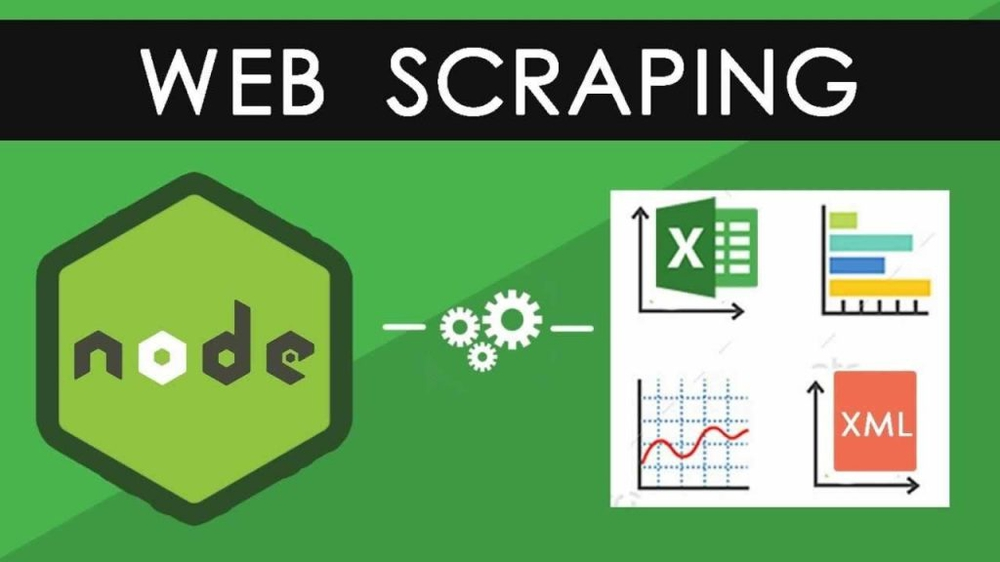

## Pick a website and describe your objective

- Browse through different sites and pick on to scrape. Check the "Project Ideas" section for inspiration
- Identify the information you'd like to scrape from the site. Decide the format of the output CSV file.
- Summarize your project idea and outline your strategy in a Jupyter Notebook.

## Project Outline


- I'm going to scrape https://github.com/topics
- I'll get a list of topics. For each topic, we'll get topic title, topic page URL and topic description.
- For each topic, we'll get the top 30 repositories in the topic from the topic page.
- For each topic we'll create a CSV file in the following format:


```
Repo Name,User Name,Stars,Repo URL
three.js,mrdoob,90100,https://github.com/mrdoob/three.js
react-three-fiber,libgdx,21300,https://github.com/libgdx/libgdx
```

In [10]:
!pip install beautifulsoup4 --upgrade --quiet

In [31]:
!pip install pandas --upgrade --quiet

In [92]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import os

## Use the requests library to download web pages.

In [1]:
!pip install requests --upgrade --quiet

In [3]:
URL = 'https://github.com/topics'

In [4]:
response = requests.get(URL)

Status Code : https://httpstatuses.io/

In [5]:
response.status_code

200

In [6]:
len(response.text)

153520

In [7]:
page_contents = response.text

In [8]:
page_contents[:100]

'\n\n<!DOCTYPE html>\n<html lang="en" data-color-mode="auto" data-light-theme="light" data-dark-theme="d'

In [9]:
with open('webpage.html','w',encoding="utf-8") as f:
    f.write(page_contents)

## Use Beautiful Soup to parse and extract information

In [12]:
doc = BeautifulSoup(page_contents,'html.parser')

In [13]:
type(doc)

bs4.BeautifulSoup

In [14]:
p_tags = doc.find_all('p')
p_tags[:10]

[<p class="f4 color-fg-muted col-md-6 mx-auto">Browse popular topics on GitHub.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Android
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Android is an operating system built by Google designed for mobile devices.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Sass
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Sass is a stable extension to classic CSS.</p>,
 <p class="f3 lh-condensed text-center Link--primary mb-0 mt-1">
         Chrome extension
       </p>,
 <p class="f5 color-fg-muted text-center mb-0 mt-1">Chrome extensions enable users to customize the Chrome browsing experience.</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f3 lh-condensed mb-0 

#### Topic Title Selector

In [15]:
selection_class = "f3 lh-condensed mb-0 mt-1 Link--primary"

In [16]:
topic_title_tags = doc.find_all('p',{'class': selection_class})

In [17]:
len(topic_title_tags)

30

In [18]:
topic_title_tags

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Angular</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ansible</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">API</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Arduino</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">ASP.NET</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Atom</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Awesome Lists</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amazon Web Services</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Azure</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Babel</p>,
 <p class="f3 lh-condensed m

In [19]:
topic_title_tags[:5]

[<p class="f3 lh-condensed mb-0 mt-1 Link--primary">3D</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Ajax</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Algorithm</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Amp</p>,
 <p class="f3 lh-condensed mb-0 mt-1 Link--primary">Android</p>]

### Description Selector

How to find Parent Class : https://www.crummy.com/software/BeautifulSoup/bs4/doc/

In [20]:
desc_selector = "f5 color-fg-muted mb-0 mt-1"
topic_desc_tags = doc.find_all('p',{'class': desc_selector})

In [21]:
topic_desc_tags[:5]

[<p class="f5 color-fg-muted mb-0 mt-1">
           3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Ajax is a technique for creating interactive web applications.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Algorithms are self-contained sequences that carry out a variety of tasks.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Amp is a non-blocking concurrency library for PHP.
         </p>,
 <p class="f5 color-fg-muted mb-0 mt-1">
           Android is an operating system built by Google designed for mobile devices.
         </p>]

In [22]:
topic_title_tag0 = topic_title_tags[0]

In [23]:
divtag = topic_title_tag0.parent

In [24]:
topic_link_tags = doc.find_all('a',{'class':'no-underline flex-grow-0'})

In [25]:
len(topic_link_tags)

30

In [26]:
topic0_url = 'https://github.com'+topic_link_tags[0]['href']
print(topic0_url)

https://github.com/topics/3d


In [27]:
topic_title_tags[0].text

'3D'

### To get Topic Titles

In [28]:
topic_titles = []

for tag in topic_title_tags:
    topic_titles.append(tag.text)
    
print(topic_titles)

['3D', 'Ajax', 'Algorithm', 'Amp', 'Android', 'Angular', 'Ansible', 'API', 'Arduino', 'ASP.NET', 'Atom', 'Awesome Lists', 'Amazon Web Services', 'Azure', 'Babel', 'Bash', 'Bitcoin', 'Bootstrap', 'Bot', 'C', 'Chrome', 'Chrome extension', 'Command line interface', 'Clojure', 'Code quality', 'Code review', 'Compiler', 'Continuous integration', 'COVID-19', 'C++']


### To get Topic Description

In [29]:
topic_desc = []

for tag in topic_desc_tags:
    topic_desc.append(tag.text.strip())
    
topic_desc[:5]

['3D refers to the use of three-dimensional graphics, modeling, and animation in various industries.',
 'Ajax is a technique for creating interactive web applications.',
 'Algorithms are self-contained sequences that carry out a variety of tasks.',
 'Amp is a non-blocking concurrency library for PHP.',
 'Android is an operating system built by Google designed for mobile devices.']

### To get Topic URL's

In [30]:
topic_urls = []
base_url = 'https://github.com'

for tag in topic_link_tags:
    topic_urls.append(base_url+tag['href'])
    
topic_urls

['https://github.com/topics/3d',
 'https://github.com/topics/ajax',
 'https://github.com/topics/algorithm',
 'https://github.com/topics/amphp',
 'https://github.com/topics/android',
 'https://github.com/topics/angular',
 'https://github.com/topics/ansible',
 'https://github.com/topics/api',
 'https://github.com/topics/arduino',
 'https://github.com/topics/aspnet',
 'https://github.com/topics/atom',
 'https://github.com/topics/awesome',
 'https://github.com/topics/aws',
 'https://github.com/topics/azure',
 'https://github.com/topics/babel',
 'https://github.com/topics/bash',
 'https://github.com/topics/bitcoin',
 'https://github.com/topics/bootstrap',
 'https://github.com/topics/bot',
 'https://github.com/topics/c',
 'https://github.com/topics/chrome',
 'https://github.com/topics/chrome-extension',
 'https://github.com/topics/cli',
 'https://github.com/topics/clojure',
 'https://github.com/topics/code-quality',
 'https://github.com/topics/code-review',
 'https://github.com/topics/compil

In [33]:
topic_dict = {
    'Title':topic_titles,
    'Description':topic_desc,
    'URL':topic_urls
}

In [34]:
topic_df = pd.DataFrame(topic_dict)
topic_df.head()

,Title,Description,URL
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


## Getting Information Out of Topic Page

In [35]:
topic_page_url = topic_urls[0]
print(topic_page_url)

https://github.com/topics/3d


In [36]:
response = requests.get(topic_page_url)
response.status_code

200

In [37]:
len(response.text)

460402

In [38]:
topic_doc = BeautifulSoup(response.text,'html.parser')

In [39]:
h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
repo_tags = topic_doc.find_all('h3',{'class':h3_selection_class})

In [88]:
repo_tags[:1]

[<h3 class="f3 color-fg-muted text-normal lh-condensed">
 <a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-turbo="false" data-view-component="true" href="/mrdoob">
             mrdoob
 </a>          /
           <a class="text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904a4238816bc9b51ab7772f3e3644ce897d8dd4e5" data-turbo="false" data-view-component="true" href="/mrdoob/thr

In [41]:
len(repo_tags)

20

In [42]:
a_tags = repo_tags[0].find_all('a')
a_tags

[<a data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"OWNER","click_visual_representation":"REPOSITORY_OWNER_HEADING","actor_id":null,"record_id":97088,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="4bdbc49d3c05ae7f70b531fbce709a384200b0768554e0172950286a8db30940" data-turbo="false" data-view-component="true" href="/mrdoob">
             mrdoob
 </a>,
 <a class="text-bold wb-break-word" data-hydro-click='{"event_type":"explore.click","payload":{"click_context":"REPOSITORY_CARD","click_target":"REPOSITORY","click_visual_representation":"REPOSITORY_NAME_HEADING","actor_id":null,"record_id":576201,"originating_url":"https://github.com/topics/3d","user_id":null}}' data-hydro-click-hmac="517d3d5cb9d89752156923904a4238816bc9b51ab7772f3e3644ce897d8dd4e5" data-turbo="false" data-view-component="true" href="/mrdoob/three.js">
             three.js
 </a>]

In [43]:
a_tags[0].text.strip()

'mrdoob'

In [44]:
print(base_url)

https://github.com


In [45]:
repo_url = base_url + a_tags[1]['href']
print(repo_url)

https://github.com/mrdoob/three.js


In [46]:
star_tags = topic_doc.find_all('span',class_="Counter js-social-count")

In [47]:
len(star_tags)

20

In [48]:
star_tags[0].text.strip()

'90.1k'

In [49]:
def parse_star_count(stars_str):
    stars_str = stars_str.strip()
    if stars_str[-1] == 'k':
        return int(float(stars_str[:-1])*1000)
    return int(stars_str)

In [50]:
parse_star_count(star_tags[0].text.strip())

90100

In [51]:
def get_repo_info(h3_tag,star_tag): #return all the required info about a repository
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username,repo_name,stars,repo_url

In [52]:
get_repo_info(repo_tags[0],star_tags[0])

('mrdoob', 'three.js', 90100, 'https://github.com/mrdoob/three.js')

In [53]:
range(len(repo_tags))

range(0, 20)

In [54]:
topic_repos_dict = {
    'User Name':[],
    'Repo Name':[],
    'Stars':[],
    'Repo URL':[]
}

for i in range(len(repo_tags)):
    repo_info = get_repo_info(repo_tags[i],star_tags[i])
    topic_repos_dict['User Name'].append(repo_info[0])
    topic_repos_dict['Repo Name'].append(repo_info[1])
    topic_repos_dict['Stars'].append(repo_info[2])
    topic_repos_dict['Repo URL'].append(repo_info[3])

In [113]:
def get_topic_page(topic_url):
    # To Download the Page
    response = requests.get(topic_url)
    # To Check successful Reponse
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    # To Parse using Beautiful Soup
    topic_doc = BeautifulSoup(response.text,'html.parser')
    return topic_doc
    
def get_repo_info(h3_tag,star_tag): #return all the required info about a repository
    a_tags = h3_tag.find_all('a')
    username = a_tags[0].text.strip()
    repo_name = a_tags[1].text.strip()
    repo_url = base_url + a_tags[1]['href']
    stars = parse_star_count(star_tag.text.strip())
    return username,repo_name,stars,repo_url
    
    
def get_topic_repos(topic_doc):
    # To get h3 tags containing repo title, repo URL and username
    h3_selection_class = 'f3 color-fg-muted text-normal lh-condensed'
    repo_tags = topic_doc.find_all('h3',{'class':h3_selection_class})
    # To get star tags
    star_tags = topic_doc.find_all('span',class_="Counter js-social-count")
    # To create dictionary for topic repositories
    topic_repos_dict = {
    'User Name':[],
    'Repo Name':[],
    'Stars':[],
    'Repo URL':[]
    }
    
    # Get Repo Info
    for i in range(len(repo_tags)):
        repo_info = get_repo_info(repo_tags[i],star_tags[i])
        topic_repos_dict['User Name'].append(repo_info[0])
        topic_repos_dict['Repo Name'].append(repo_info[1])
        topic_repos_dict['Stars'].append(repo_info[2])
        topic_repos_dict['Repo URL'].append(repo_info[3])
        
    return pd.DataFrame(topic_repos_dict)

def scrape_topic(topic_url,path):
    if os.path.exists(path):
        print("The file {} already exists. so skipping it".format(path),'\n')
    topic_df = get_topic_repos(get_topic_page(topic_url))
    topic_df.to_csv(path,index=None)

In [56]:
url4 = topic_urls[4]
url4

'https://github.com/topics/android'

In [57]:
topic4_doc = get_topic_page(url4)
topic4_repos = get_topic_repos(topic4_doc)

In [59]:
topic4_repos

,User Name,Repo Name,Stars,Repo URL
0,flutter,flutter,151000,https://github.com/flutter/flutter
1,facebook,react-native,109000,https://github.com/facebook/react-native
2,justjavac,free-programming-books-zh_CN,101000,https://github.com/justjavac/free-programming-...
3,Genymobile,scrcpy,79800,https://github.com/Genymobile/scrcpy
4,Hack-with-Github,Awesome-Hacking,62900,https://github.com/Hack-with-Github/Awesome-Ha...
5,google,material-design-icons,47800,https://github.com/google/material-design-icons
6,Solido,awesome-flutter,46000,https://github.com/Solido/awesome-flutter
7,wasabeef,awesome-android-ui,45800,https://github.com/wasabeef/awesome-android-ui
8,square,okhttp,43700,https://github.com/square/okhttp
9,android,architecture-samples,42400,https://github.com/android/architecture-samples


In [84]:
get_topic_repos(get_topic_page(topic_urls[5]))

,User Name,Repo Name,Stars,Repo URL
0,justjavac,free-programming-books-zh_CN,101000,https://github.com/justjavac/free-programming-...
1,angular,angular,87100,https://github.com/angular/angular
2,storybookjs,storybook,77700,https://github.com/storybookjs/storybook
3,leonardomso,33-js-concepts,55500,https://github.com/leonardomso/33-js-concepts
4,ionic-team,ionic-framework,48800,https://github.com/ionic-team/ionic-framework
5,prettier,prettier,45200,https://github.com/prettier/prettier
6,Asabeneh,30-Days-Of-JavaScript,34500,https://github.com/Asabeneh/30-Days-Of-JavaScript
7,SheetJS,sheetjs,32500,https://github.com/SheetJS/sheetjs
8,angular,angular-cli,26000,https://github.com/angular/angular-cli
9,angular,components,23400,https://github.com/angular/components


In [61]:
range(len(repo_tags))

range(0, 20)

In [82]:
topic_repos_df = pd.DataFrame(topic_repos_dict)
topic_repos_df[:5]

,User Name,Repo Name,Stars,Repo URL
0,mrdoob,three.js,90100,https://github.com/mrdoob/three.js
1,pmndrs,react-three-fiber,21900,https://github.com/pmndrs/react-three-fiber
2,libgdx,libgdx,21300,https://github.com/libgdx/libgdx
3,BabylonJS,Babylon.js,19600,https://github.com/BabylonJS/Babylon.js
4,ssloy,tinyrenderer,16400,https://github.com/ssloy/tinyrenderer


## Write a single function to :

1. Get the list of topics from the topic page
2. Get the list of top repos from the individual topic pages
3. For each topics create a CSV of the top repos for the topic

In [63]:
topics_url ='https://github.com/topics/'
print(topics_url)

https://github.com/topics/


In [64]:
def get_topic_titles(doc):
    selection_class = "f3 lh-condensed mb-0 mt-1 Link--primary"
    topic_title_tags = doc.find_all('p',{'class': selection_class})
    topic_titles = []
    for tag in topic_title_tags:
        topic_titles.append(tag.text)
    return topic_titles
    
def get_topic_desc(doc):
    desc_selector = "f5 color-fg-muted mb-0 mt-1"
    topic_desc_tags = doc.find_all('p',{'class': desc_selector})
    topic_desc = []
    for tag in topic_desc_tags:
        topic_desc.append(tag.text.strip())
    return topic_desc

def get_topic_urls(doc):     
    topic_link_tags = doc.find_all('a',{'class':'no-underline flex-grow-0'})
    topic_urls = []
    base_url = 'https://github.com'
    for tag in topic_link_tags:
        topic_urls.append(base_url+tag['href'])
    return topic_urls

def scrape_topics():
    topics_url ='https://github.com/topics/'
    reponse = requests.get(topics_url)
    if response.status_code != 200:
        raise Exception('Failed to load page {}'.format(topic_url))
    topics_dict = {
        'Title':get_topic_titles(doc),
        'Description': get_topic_desc(doc),
        'URL':get_topic_urls(doc)
    }
    
    return pd.DataFrame(topics_dict)

In [65]:
scrape_topics().head()

,Title,Description,URL
0,3D,3D refers to the use of three-dimensional grap...,https://github.com/topics/3d
1,Ajax,Ajax is a technique for creating interactive w...,https://github.com/topics/ajax
2,Algorithm,Algorithms are self-contained sequences that c...,https://github.com/topics/algorithm
3,Amp,Amp is a non-blocking concurrency library for ...,https://github.com/topics/amphp
4,Android,Android is an operating system built by Google...,https://github.com/topics/android


## Create CSV (File) with the extracted information

In [85]:
for index,row in topic_df.iterrows():
    print(row['Title'],row['URL'])

3D https://github.com/topics/3d
Ajax https://github.com/topics/ajax
Algorithm https://github.com/topics/algorithm
Amp https://github.com/topics/amphp
Android https://github.com/topics/android
Angular https://github.com/topics/angular
Ansible https://github.com/topics/ansible
API https://github.com/topics/api
Arduino https://github.com/topics/arduino
ASP.NET https://github.com/topics/aspnet
Atom https://github.com/topics/atom
Awesome Lists https://github.com/topics/awesome
Amazon Web Services https://github.com/topics/aws
Azure https://github.com/topics/azure
Babel https://github.com/topics/babel
Bash https://github.com/topics/bash
Bitcoin https://github.com/topics/bitcoin
Bootstrap https://github.com/topics/bootstrap
Bot https://github.com/topics/bot
C https://github.com/topics/c
Chrome https://github.com/topics/chrome
Chrome extension https://github.com/topics/chrome-extension
Command line interface https://github.com/topics/cli
Clojure https://github.com/topics/clojure
Code quality h

In [105]:
import os

In [120]:
def scrape_topics_repos():
    print('Scraping list of Topics')
    topic_df = scrape_topics()
    
    os.makedirs('data',exist_ok = True)
    
    for index,row in topic_df.iterrows():
        print('Scrapping top repositories for "{}"'.format(row['Title']))
        scrape_topic(row['URL'],'Data/{}.csv'.format(row['Title']))

In [121]:
scrape_topics_repos()

Scraping list of Topics
Scrapping top repositories for "3D"
Scrapping top repositories for "Ajax"
Scrapping top repositories for "Algorithm"
Scrapping top repositories for "Amp"
Scrapping top repositories for "Android"
Scrapping top repositories for "Angular"
Scrapping top repositories for "Ansible"
Scrapping top repositories for "API"
Scrapping top repositories for "Arduino"
Scrapping top repositories for "ASP.NET"
Scrapping top repositories for "Atom"
Scrapping top repositories for "Awesome Lists"
Scrapping top repositories for "Amazon Web Services"
Scrapping top repositories for "Azure"
Scrapping top repositories for "Babel"
Scrapping top repositories for "Bash"
Scrapping top repositories for "Bitcoin"
Scrapping top repositories for "Bootstrap"
Scrapping top repositories for "Bot"
Scrapping top repositories for "C"
Scrapping top repositories for "Chrome"
Scrapping top repositories for "Chrome extension"
Scrapping top repositories for "Command line interface"
Scrapping top repositori

In [123]:
topic_df.to_csv('GitHub_Topics.csv')
print('GitHub Topic CSV File Downloaded...!!')

GitHub Topic CSV File Downloaded...!!


## Document and Share your work